# Linear Regression - 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


selling_price is our target variable. Remaining variables are our predictors.

### Univariate Linear Regression from scratch

Model and max_power has the maximum correlation with the data

In [3]:
X = df['max_power'].values  # to get the values only instead of a series
Y = df['selling_price'].values

In [4]:
X.shape, Y.shape # both are one dimensional numpy arrays

((19820,), (19820,))

#### Helper functions

In [5]:
# hypothesis function
def predict(x, w):
    # this calculation is for one sample, hence no dot product      
    # y_hat = w1.x + w0  --> hypothesis
    y_hat = w[1] * x + w[0]
    return y_hat

In [6]:
def error(X, Y, w):
    # for every sample, calculate the squared error and later take the average
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = predict(X[i], w)
        total_error += (Y[i] - y_hat) ** 2
    return  total_error/m

In [10]:
# dL/dW - we will use all the samples for gradient calculation
def gradient(X, Y, w):
    m = X.shape[0]
    grad = np.zeros((2,))
    # SGD updates params based on gradient calculation of just one sample
    # Batch GD updates params based on gradient calculation of all the sample
    for i in range(m):
        y_hat = predict(X[i], w)
        grad[1] += - 2 * (Y[i] - y_hat) * X[i]
        grad[0] += - 2 * (Y[i] - y_hat)
    return grad/m

#### Training Process of LR - Gradient Descent

In [11]:
def gradient_descent(X, Y, epochs = 100, learning_rate = 0.1):
    w = np.zeros((2,))
    w_list, e_list = [], [] # This is just to log the intermediate e's and w's
    # run the loop 100 times
    for i in range(epochs):
        # Calculate the gradient
        grad = gradient(X, Y, w)
        # Keep updating the weights
        w[0] = w[0] - learning_rate * grad[0] 
        w[1] = w[1] - learning_rate * grad[1]
        # Store how the weight was getting update in every iteration
        w_list.append([w[0], w[1]])
        # Store how the error/L is changing in every iteration
        e_list.append(error(X, Y, w))
    return w, w_list, e_list

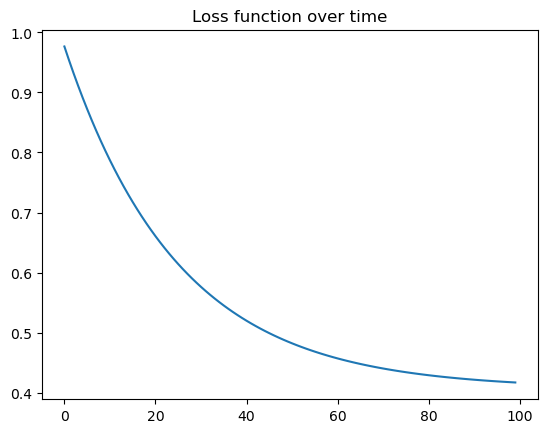

In [13]:
# too small of learning - takes too much time
w, w_list, e_list = gradient_descent(X, Y, epochs = 100, learning_rate = 0.01)
plt.plot(e_list)
plt.title("Loss function over time")
plt.show()

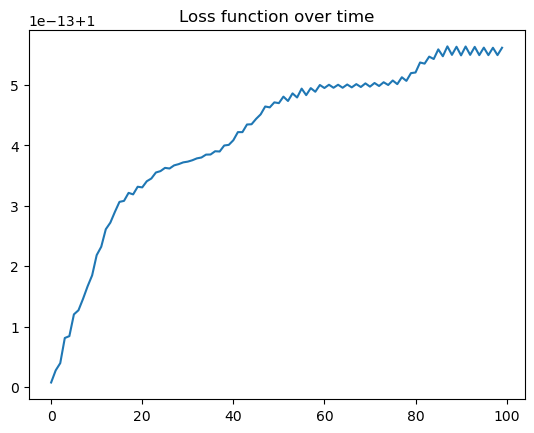

In [18]:
# too big of learning - never converges
w, w_list, e_list = gradient_descent(X, Y, epochs = 100, learning_rate = 1)
plt.plot(e_list)
plt.title("Loss function over time")
plt.show()

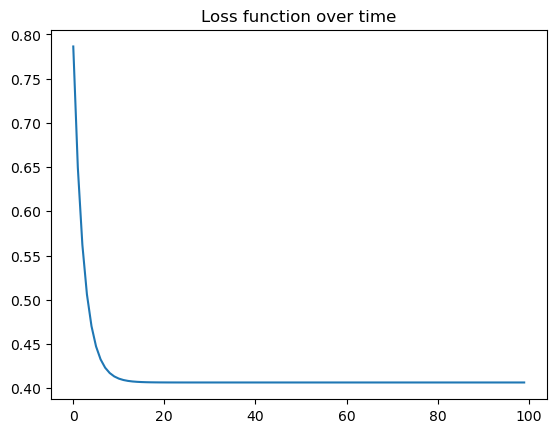

In [19]:
# perfect learning rate - converges quickly
w, w_list, e_list = gradient_descent(X, Y, epochs = 100, learning_rate = 0.1)
plt.plot(e_list)
plt.title("Loss function over time")
plt.show()

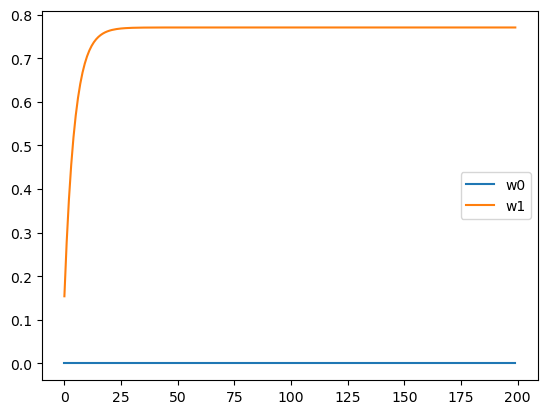

In [23]:
w_list = np.array(w_list)
plt.plot(w_list[:, 0], label = "w0") # Hence the model passes through origin, y intercept is zero.
plt.plot(w_list[:, 1], label = "w1")
plt.legend()
plt.show()

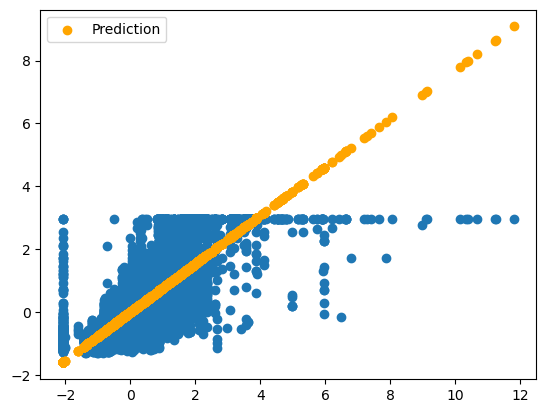

In [24]:
Y_hat = predict(X, w)
plt.scatter(X, Y)
plt.scatter(X, Y_hat, color = "orange", label = "Prediction")
plt.legend()
plt.show()

The model that we have actually learned is a linear model which kind of is fair for the normal data, but for outliers, it is not working well.<br>This is because the actual relation is not linear.

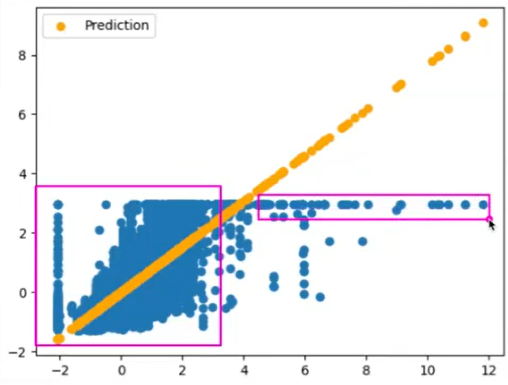

### Evaluation

1. Whether the model has even learnt something or not? Checking performance on Training Data itself
2. Once, we are sure that model has learnt something - we can check true performance of the model upon testing data

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/